# **Milestone 2**

We have built two Convolutional Neural Network architectures in Milestone 1. Here, we will further try to achieve better performance by increasing the number of parameters/weights. Therefore, we will start this Milestone with three popular Transfer Learning architectures, namely, VGG16, ResNet v2, and Efficient Net. Please feel free to explore other pre-trained models as well. Link to Keras documentation for pre-trained models - https://keras.io/api/applications/

**Note:** We will mount our drive and import our dataset once again for Milestone 2.

## **Mounting the Drive**

**NOTE:**  Please use Google Colab from your browser for this notebook. **Google.colab is not a library that can be downloaded locally on your device.**

In [ ]:
# Mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## **Importing the Libraries**

In [1]:
import zipfile
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os

# Importing Deep Learning Libraries

from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Input, Dropout, GlobalAveragePooling2D, Flatten, Conv2D, BatchNormalization, Activation, MaxPooling2D, LeakyReLU
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
from tensorflow.keras.models import load_model

C:\Users\zadorozhnyy.v\Anaconda3\lib\site-packages\numpy\core\__init__.py:27: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\zadorozhnyy.v\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.JPIJNSWNNAN3CE6LLI5FWSPHUT2VXMTH.gfortran-win_amd64.dll
C:\Users\zadorozhnyy.v\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:\n%s" %


### **Let us load the data**

**Note:** 
- You must download the dataset from the link provided on Olympus and upload the same on your Google drive before executing the code in the next cell.
- In case of any error, please make sure that the path of the file is correct as the path may be different for you.

In [ ]:
# Storing the path of the data file from the Google drive
path = '/content/drive/MyDrive/Facial_emotion_images.zip'

# The data is provided as a zip file so we need to extract the files from the zip file
with zipfile.ZipFile(path, 'r') as zip_ref:
    zip_ref.extractall()

In [2]:
picture_size = 48
folder_path = "Facial_emotion_images/"

## **Transfer Learning Architectures**

In this section, we will create several Transfer Learning architectures. For the pre-trained models, we will select three popular architectures namely, VGG16, ResNet v2, and Efficient Net. The difference between these architectures and the previous architectures is that these will require 3 input channels while the earlier ones worked on 'grayscale' images. Therefore, we need to create new DataLoaders.

### **Creating our Data Loaders for Transfer Learning Architectures**

In this section, we are creating data loaders that we will use as inputs to our Neural Network. Unlike in Milestone 1, we will have to go with color_mode = 'rgb' as this is the required format for the transfer learning architectures.

In [7]:
batch_size  = 32
img_size = 48

datagen_train = ImageDataGenerator(horizontal_flip = True,
                                    brightness_range=(0.,2.),
                                    rescale=1./255,
                                    shear_range=0.3)

train_set = datagen_train.flow_from_directory(folder_path + "train",
                                              target_size = (img_size, img_size),
                                              color_mode = 'rgb',
                                              batch_size = batch_size,
                                              class_mode = 'categorical',
                                              shuffle = True)


datagen_validation = ImageDataGenerator(horizontal_flip = True,
                                    brightness_range=(0.,2.),
                                    rescale=1./255,
                                    shear_range=0.3)

validation_set = datagen_validation.flow_from_directory(folder_path + "validation",
                                              target_size = (img_size, img_size),
                                              color_mode = 'rgb',
                                              batch_size = batch_size,
                                              class_mode = 'categorical',
                                              shuffle = True)


datagen_test = ImageDataGenerator(horizontal_flip = True,
                                    brightness_range=(0.,2.),
                                    rescale=1./255,
                                    shear_range=0.3)

test_set = datagen_test.flow_from_directory(folder_path + "test",
                                              target_size = (img_size, img_size),
                                              color_mode = 'rgb',
                                              batch_size = batch_size,
                                              class_mode = 'categorical',
                                              shuffle = True)

Found 15109 images belonging to 4 classes.
Found 4977 images belonging to 4 classes.
Found 128 images belonging to 4 classes.


## **VGG16 Model**

### **Importing the VGG16 Architecture**

In [37]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras import Model

vgg = VGG16(include_top = False, weights = 'imagenet', input_shape = (48, 48, 3))
vgg.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 48, 48, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 48, 48, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 48, 48, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 24, 24, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 24, 24, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 24, 24, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 12, 12, 128)       0     

### **Model Building**

* In this model, we will import till the **'block5_pool'** layer of the VGG16 model. You can scroll down in the model summary and look for 'block5_pool'. You can choose any other layer as well.
* Then we will add a Flatten layer, which receives the output of the 'block5_pool' layer as its input.
* We will add a few Dense layers and use 'relu' activation function on them.
* You may use Dropout and BatchNormalization layers as well.
* Then we will add our last dense layer, which must have 4 neurons and a 'softmax' activation function.

In [38]:
transfer_layer = vgg.get_layer('block5_pool')
vgg.trainable = False

# Add classification layers on top of it  

# Flattenning the output from the 3rd block of the VGG16 model
x = Flatten()(transfer_layer.output)

# Adding a Dense layer with 256 neurons
x = Dense(256, activation = 'relu')(x)

# Add a Dense Layer with 128 neurons
x = Dense(128)(x)

# Add a DropOut layer with Drop out ratio of 0.3
x = Dropout(0.3)(x)

# Add a Dense Layer with 64 neurons
x = Dense(64)(x)

# Add a Batch Normalization layer
x = BatchNormalization()(x)

# Adding the final dense layer with 4 neurons and use 'softmax' activation
pred = Dense(4, activation='softmax')(x)

vggmodel = Model(vgg.input, pred) # Initializing the model
vggmodel.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 48, 48, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 48, 48, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 48, 48, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 24, 24, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 24, 24, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 24, 24, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 12, 12, 128)       0   

### **Compiling and Training the VGG16 Model**

In [188]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

checkpoint = ModelCheckpoint("./vggmodel.h5", monitor = 'val_loss', verbose = 1, save_best_only = True, mode = 'min')
if os.path.exists("./vggmodel.h5"):
    print("model exists")
    vggmodel = load_model("./vggmodel.h5")

early_stopping = EarlyStopping(monitor = 'val_loss',
                          min_delta = 0,
                          patience = 3,
                          verbose = 1,
                          restore_best_weights = True
                          )

reduce_learningrate = ReduceLROnPlateau(monitor = 'val_loss',
                              factor = 0.2,
                              patience = 3,
                              verbose = 1,
                              min_delta = 0.0001)

callbacks_list = [early_stopping, checkpoint, reduce_learningrate]

epochs = 20

In [189]:
vggmodel.compile(optimizer = Adam(learning_rate=0.0002), loss = 'categorical_crossentropy', metrics = ['accuracy'])

# Write your code to compile the vggmodel. Use categorical crossentropy as the loss function, Adam Optimizer with 0.001 learning rate, and set metrics to 'accuracy'. 

In [190]:
history = vggmodel.fit(train_set, validation_data = validation_set, callbacks = callbacks_list, epochs=epochs)# Write your code to fit your model. Use train_set as the training data and validation_set as the validation data. Train the model for 20 epochs.


Epoch 1/20
473/473 [==============================] - 92s 183ms/step - loss: 1.5073 - accuracy: 0.3502 - val_loss: 1.2184 - val_accuracy: 0.4549

Epoch 00001: val_loss improved from inf to 1.21841, saving model to ./vggmodel.h5
Epoch 2/20
473/473 [==============================] - 114s 238ms/step - loss: 1.2227 - accuracy: 0.4419 - val_loss: 1.1583 - val_accuracy: 0.4921

Epoch 00002: val_loss improved from 1.21841 to 1.15831, saving model to ./vggmodel.h5
Epoch 3/20
473/473 [==============================] - 79s 161ms/step - loss: 1.1984 - accuracy: 0.4559 - val_loss: 1.1578 - val_accuracy: 0.4786

Epoch 00003: val_loss improved from 1.15831 to 1.15784, saving model to ./vggmodel.h5
Epoch 4/20
473/473 [==============================] - 104s 216ms/step - loss: 1.1677 - accuracy: 0.4772 - val_loss: 1.2231 - val_accuracy: 0.4438

Epoch 00004: val_loss did not improve from 1.15784
Epoch 5/20
473/473 [==============================] - 103s 214ms/step - loss: 1.1573 - accuracy: 0.4748 - val

In [178]:
pd.DataFrame(history.history).to_csv("./vgg_hist.csv")
vggmodel.save("./vggmodel.h5")

In [193]:
#df = pd.read_csv("./vgg_hist.csv")
#df.drop(columns=df.columns[0], axis=1, inplace=True)
df = pd.DataFrame(history.history)
#df.reset_index()

### **Evaluating the VGG16 model**

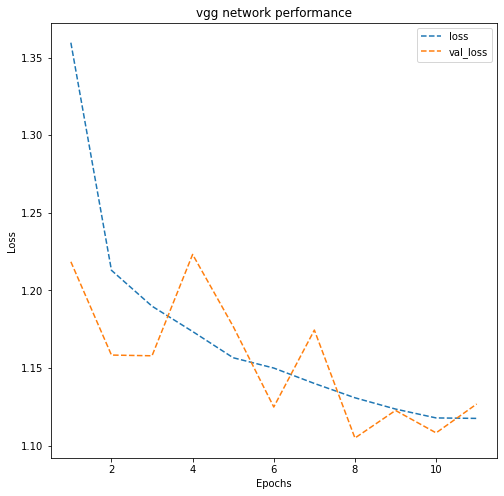

In [194]:

list_ep = [i for i in range(1, 1 + len(df['loss']))]

plt.figure(figsize = (8, 8))

plt.plot(list_ep, df['loss'], ls = '--', label = 'loss')

plt.plot(list_ep, df['val_loss'], ls = '--', label = 'val_loss')

plt.ylabel('Loss')

plt.xlabel('Epochs')

plt.legend()
plt.title('vgg network performance')
plt.show()

In [195]:
# Write your code to evaluate model performance on the test set
#vggmodel = load_model("./vggmodel.h5")
vggmodel.evaluate(test_set)

4/4 [==============================] - 2s 74ms/step - loss: 1.1374 - accuracy: 0.4688


[1.1373841762542725, 0.46875]

**Think About It:**

- What do you infer from the general trend in the training performance? 
- Is the training accuracy consistently improving? 
- Is the validation accuracy also improving similarly?

**Observations and Insights: Training accuracy constantly improving, hence, the model is able to learn. However, at some point, validation loss stopped decreasing and validation accuracy stopped to increse despite the improvement of this metric for train, so the model began to overfit and the training has to be stopped. The accuracy at this moment is about 50%, the similar value the model reaches at test dataset.**

**Note: You can even go back and build your own architecture on top of the VGG16 Transfer layer and see if you can improve the performance**

## **ResNet V2 Model**

In [34]:
import tensorflow as tf
import tensorflow.keras.applications as ap
from tensorflow.keras import Model

Resnet = ap.ResNet101(include_top = False, weights = "imagenet", input_shape=(48,48,3))
Resnet.summary()

Model: "resnet101"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 48, 48, 3)]  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 54, 54, 3)    0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 24, 24, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 24, 24, 64)   256         conv1_conv[0][0]                 
__________________________________________________________________________________________

### **Model Building**

* In this model, we will import till the **'conv5_block3_add'** layer of the ResNet model. You can scroll down in the model summary and look for 'conv5_block3_add'. You can choose any other layer as well.
* Then we will add a Flatten layer, which receives the output of the 'conv5_block3_add' layer as its input.
* We will add a few Dense layers and use 'relu' activation function on them.
* You may use Dropout and BatchNormalization layers as well.
* Then we will add our last dense layer, which must have 4 neurons and a 'softmax' activation function.

In [36]:
transfer_layer_Resnet = Resnet.get_layer('conv5_block3_out')
Resnet.trainable=False

# Add classification layers on top of it

# Flattenning the output from the 3rd block of the VGG16 model
x = Flatten()(transfer_layer_Resnet.output)

# Add a Dense layer with 256 neurons
x = Dense(256, activation = 'relu')(x)

# Add a Dense Layer with 128 neurons
x = Dense(128, activation = 'relu')(x)

# Add a DropOut layer with Drop out ratio of 0.3
x = Dropout(0.3)(x)
# Add a Dense Layer with 64 neurons
x = Dense(64)(x)

# Add a Batch Normalization layer
x = BatchNormalization()(x)

# Add the final dense layer with 4 neurons and use a 'softmax' activation
pred = Dense(4, activation = 'softmax')(x)

resnetmodel = Model(Resnet.input, pred) # Initializing the model
resnetmodel.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 48, 48, 3)]  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 54, 54, 3)    0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 24, 24, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 24, 24, 64)   256         conv1_conv[0][0]                 
____________________________________________________________________________________________

### **Compiling and Training the Model**

In [10]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
'''
if os.path.exists("./Resnetmodel.h5"):
    print('model exists')
    resnetmodel = load_model("./Resnetmodel.h5")
'''
checkpoint = ModelCheckpoint("./Resnetmodel.h5", monitor = 'val_acc', verbose = 1, save_best_only = True, mode = 'max')

early_stopping = EarlyStopping(monitor = 'val_loss',
                          min_delta = 0,
                          patience = 3,
                          verbose = 1,
                          restore_best_weights = True
                          )

reduce_learningrate = ReduceLROnPlateau(monitor = 'val_loss',
                              factor = 0.2,
                              patience = 3,
                              verbose = 1,
                              min_delta = 0.0001)


callbacks_list = [early_stopping, checkpoint, reduce_learningrate]

epochs = 20

In [11]:
resnetmodel.compile(optimizer = Adam(learning_rate=0.001), loss = 'categorical_crossentropy', metrics = ['accuracy'])
# Write your code to compile your resnetmodel. Use categorical crossentropy as your loss function, Adam Optimizer with 0.001 learning rate, and set your metrics to 'accuracy'. 

In [12]:
history = resnetmodel.fit(train_set, validation_data = validation_set, callbacks = callbacks_list, epochs=epochs)# Write your code to fit your model. Use train_set as the training data and validation_set as the validation data. Train the model for 20 epochs.


Epoch 1/20
473/473 [==============================] - 46s 77ms/step - loss: 1.4585 - accuracy: 0.2665 - val_loss: 1.4222 - val_accuracy: 0.1814
Epoch 2/20
  2/473 [..............................] - ETA: 25s - loss: 1.3447 - accuracy: 0.3594

C:\Users\zadorozhnyy.v\Anaconda3\lib\site-packages\keras\callbacks\callbacks.py:706: RuntimeWarning: Can save best model only with val_acc available, skipping.
  warnings.warn('Can save best model only with %s available, '


473/473 [==============================] - 35s 74ms/step - loss: 1.3849 - accuracy: 0.2742 - val_loss: 1.3325 - val_accuracy: 0.2733
Epoch 3/20
473/473 [==============================] - 36s 76ms/step - loss: 1.3605 - accuracy: 0.3050 - val_loss: 1.3042 - val_accuracy: 0.3649
Epoch 4/20
473/473 [==============================] - 37s 79ms/step - loss: 1.3292 - accuracy: 0.3267 - val_loss: 1.2896 - val_accuracy: 0.3978
Epoch 5/20
473/473 [==============================] - 38s 80ms/step - loss: 1.3275 - accuracy: 0.3304 - val_loss: 1.2853 - val_accuracy: 0.3751276 - ac
Epoch 6/20
473/473 [==============================] - 38s 80ms/step - loss: 1.3013 - accuracy: 0.3553 - val_loss: 1.5153 - val_accuracy: 0.2708
Epoch 7/20
473/473 [==============================] - 38s 80ms/step - loss: 1.2935 - accuracy: 0.3648 - val_loss: 1.3192 - val_accuracy: 0.3414
Epoch 8/20
473/473 [==============================] - 38s 80ms/step - loss: 1.2793 - accuracy: 0.3777 - val_loss: 1.2960 - val_accuracy: 0.

In [196]:
#pd.DataFrame(history.history).to_csv("./res_hist.csv")
df = pd.read_csv("./res_hist.csv")
df.drop(columns=df.columns[0], axis=1, inplace=True)
#df = df.append(pd.DataFrame(history.history))
df.reset_index()

,index,loss,accuracy,val_loss,val_accuracy,lr
0,0,1.391698,0.264743,1.379693,0.228853,0.001
1,1,1.388137,0.259117,1.387404,0.242716,0.001
2,2,1.388981,0.263618,1.379714,0.244324,0.001
3,3,1.386902,0.264677,1.367848,0.244324,0.001
4,4,1.387780,0.260375,1.371934,0.244324,0.001
5,5,1.385412,0.265603,1.371804,0.228853,0.001
6,6,1.384934,0.268846,1.367730,0.325095,0.001
7,7,1.381675,0.272685,1.369409,0.248744,0.001
8,8,1.380741,0.272950,1.347851,0.363874,0.001
9,9,1.372692,0.285260,1.350274,0.341571,0.001


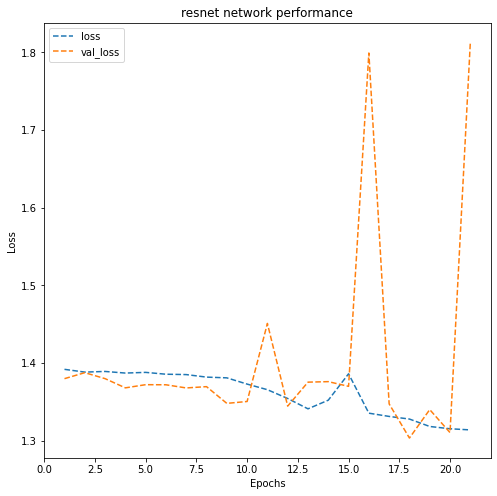

In [197]:
list_ep = [i for i in range(1, 1 + len(df))]

plt.figure(figsize = (8, 8))

plt.plot(list_ep, df['loss'], ls = '--', label = 'loss')

plt.plot(list_ep, df['val_loss'], ls = '--', label = 'val_loss')

plt.ylabel('Loss')

plt.xlabel('Epochs')

plt.legend()
plt.title('resnet network performance')
plt.show()

In [85]:
df.to_csv("./res_hist.csv")
resnetmodel.save("./Resnetmodel.h5")

### **Evaluating the ResNet Model**

In [93]:
# Write your code to evaluate model performance on the test set
resnetmodel.evaluate(test_set)

4/4 [==============================] - 1s 62ms/step - loss: 1.3775 - accuracy: 0.3281


[1.3774521350860596, 0.328125]

**Observations and Insights: ResNet-based model wasn't able to deduce loss after 1.3 value, it corresponds to the accuracy of 0.3 approximately. Both training and validation sets show the absence of improvement in metrics after the training pass this threshold in loss.**

**Choosing different values of learning rate also didn't help much - the training always stucks at the threshold above.**

**Note: You can even go back and build your own architecture on top of the ResNet Transfer layer and see if you can improve the performance.**

## **EfficientNet Model**

No model EfficientNetV2B2 in the keras applications, I used EfficientNetB2 instead

In [31]:
import tensorflow as tf
import tensorflow.keras.applications as ap
from tensorflow.keras import Model
EfficientNet = ap.EfficientNetB2(include_top=False,weights="imagenet", input_shape= (48, 48, 3))

EfficientNet.summary()

Model: "efficientnetb2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 48, 48, 3)]  0                                            
__________________________________________________________________________________________________
rescaling (Rescaling)           (None, 48, 48, 3)    0           input_1[0][0]                    
__________________________________________________________________________________________________
normalization (Normalization)   (None, 48, 48, 3)    7           rescaling[0][0]                  
__________________________________________________________________________________________________
stem_conv_pad (ZeroPadding2D)   (None, 49, 49, 3)    0           normalization[0][0]              
_____________________________________________________________________________________

### **Model Building**

**Build your own Architecture on top of the transfer layer. Be sure to have a Flatten layer after your transfer layer and also make sure you have 4 neurons and softmax activation function in your last dense layer**

In [32]:
transfer_layer_EfficientNet = EfficientNet.get_layer('block6e_expand_activation')
EfficientNet.trainable = False

# Add your Flatten layer.
x = Flatten()(transfer_layer_EfficientNet.output)

# Add your Dense layers and/or BatchNormalization and Dropout layers
x = Dense(128)(x)
x = Dropout(0.5)(x)
x = BatchNormalization()(x)

# Add your final Dense layer with 4 neurons and softmax activation function.
pred = Dense(4, activation = 'softmax')(x)

Efficientnetmodel = Model(EfficientNet.input, pred)

In [33]:
Efficientnetmodel.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 48, 48, 3)]  0                                            
__________________________________________________________________________________________________
rescaling (Rescaling)           (None, 48, 48, 3)    0           input_1[0][0]                    
__________________________________________________________________________________________________
normalization (Normalization)   (None, 48, 48, 3)    7           rescaling[0][0]                  
__________________________________________________________________________________________________
stem_conv_pad (ZeroPadding2D)   (None, 49, 49, 3)    0           normalization[0][0]              
______________________________________________________________________________________________

### **Compiling and Training the Model**

In [137]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
if os.path.exists("./Efficientnetmodel.h5"):
    print("model exists")
    Efficientnetmodel = load_model("./Efficientnetmodel.h5")
checkpoint = ModelCheckpoint("./Efficientnetmodel.h5", monitor='val_acc', verbose=1, save_best_only=True, mode='max')

early_stopping = EarlyStopping(monitor = 'val_loss',
                          min_delta = 0,
                          patience = 4,
                          verbose = 1,
                          restore_best_weights = True
                          )

reduce_learningrate = ReduceLROnPlateau(monitor = 'val_loss',
                              factor = 0.2,
                              patience = 3,
                              verbose = 1,
                              min_delta = 0.0001)
callbacks_list = [early_stopping,checkpoint,reduce_learningrate]

epochs = 10

model exists


In [138]:
Efficientnetmodel.compile(optimizer = Adam(learning_rate=0.001), loss = 'categorical_crossentropy', metrics = ['accuracy'])

# Write your code to compile your Efficientnetmodel. Use categorical crossentropy as your loss function, Adam Optimizer with 0.001 learning rate, and set your metrics to 'accuracy'.

In [139]:
history = Efficientnetmodel.fit(train_set, validation_data = validation_set, callbacks = callbacks_list, epochs=epochs)
# Write your code to fit your model. Use train_set as your training data and validation_set as your validation data. Train your model for 20 epochs.

Epoch 1/10
473/473 [==============================] - 32s 53ms/step - loss: 1.4319 - accuracy: 0.2541 - val_loss: 1.3727 - val_accuracy: 0.2443
Epoch 2/10
473/473 [==============================] - 25s 50ms/step - loss: 1.3940 - accuracy: 0.2584 - val_loss: 1.3749 - val_accuracy: 0.2443
Epoch 3/10
473/473 [==============================] - 25s 51ms/step - loss: 1.3917 - accuracy: 0.2556 - val_loss: 1.3729 - val_accuracy: 0.2289
Epoch 4/10
473/473 [==============================] - 26s 54ms/step - loss: 1.3859 - accuracy: 0.2738 - val_loss: 1.3691 - val_accuracy: 0.3667
Epoch 5/10
473/473 [==============================] - 27s 54ms/step - loss: 1.3881 - accuracy: 0.2609 - val_loss: 1.3718 - val_accuracy: 0.2443
Epoch 6/10
473/473 [==============================] - 28s 57ms/step - loss: 1.3885 - accuracy: 0.2666 - val_loss: 1.3721 - val_accuracy: 0.2289
Epoch 7/10
473/473 [==============================] - 28s 56ms/step - loss: 1.3879 - accuracy: 0.2644 - val_loss: 1.3728 - val_accuracy:

In [140]:
df = pd.read_csv("./eff_hist.csv")
df.drop(columns=df.columns[0], axis=1, inplace=True)
df = df.append(pd.DataFrame(history.history))
df.reset_index()

,index,loss,accuracy,val_loss,val_accuracy,lr
0,0,1.649874,0.247468,1.369614,0.366687,0.0010
1,1,1.413687,0.258257,1.378211,0.228853,0.0010
2,2,1.392898,0.259977,1.370497,0.366687,0.0010
3,3,1.390669,0.261169,1.373618,0.228853,0.0010
4,4,1.387244,0.265868,1.370583,0.366687,0.0002
5,0,1.414390,0.256999,1.372697,0.244324,0.0010
6,1,1.392534,0.260110,1.374894,0.244324,0.0010
7,2,1.391003,0.256403,1.372900,0.228853,0.0010
8,3,1.387971,0.269310,1.369128,0.366687,0.0010
9,4,1.388410,0.261632,1.371811,0.244324,0.0010


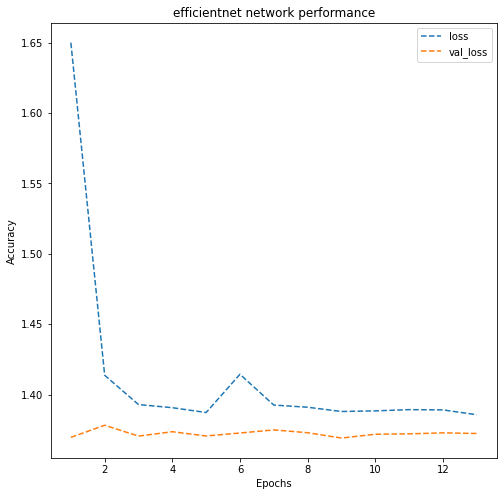

In [142]:
list_ep = [i for i in range(1, 1 + len(df))]

plt.figure(figsize = (8, 8))

plt.plot(list_ep, df['loss'], ls = '--', label = 'loss')

plt.plot(list_ep, df['val_loss'], ls = '--', label = 'val_loss')

plt.ylabel('Accuracy')

plt.xlabel('Epochs')

plt.legend()
plt.title('efficientnet network performance')
plt.show()

In [136]:
pd.DataFrame(history.history).to_csv("./eff_hist.csv")
Efficientnetmodel.save("./Efficientnetmodel.h5")

### **Evaluating the EfficientnetNet Model**

In [198]:
# Write your code to evaluate the model performance on the test set
Efficientnetmodel = load_model("./Efficientnetmodel.h5")
Efficientnetmodel.evaluate(test_set)

4/4 [==============================] - 9s 77ms/step - loss: 1.3892 - accuracy: 0.2500


[1.3891597986221313, 0.25]

**Observations and Insights:This type of network provides poor performance on both training and validation sets. After trying with different hyperparameters I found the threshold after which the training process gets slow: it is 1.38 loss, which corresponds to 0.25 accuracy. In other words, the model was unable to learn and performs no better than random guess. The validation accuracy doesn't improve as well and finally the training stops due to this reason.**

**The experiments included variation with parameter in dropout layer and learning rate: initial loss was different, but finally the models stuck at the same value of training loss**

**Note: You can even go back and build your own architecture on top of the VGG16 Transfer layer and see if you can improve the performance.**

**Think About It:**

* What is your overall performance of these Transfer Learning Architectures? Can we draw a comparison of these models' performances. Are we satisfied with the accuracies that we have received?
* Do you think our issue lies with 'rgb' color_mode?

Now that we have tried multiple pre-trained models, let's build a complex CNN architecture and see if we can get better performance.

## **Building a Complex Neural Network Architecture**

In this section, we will build a more complex Convolutional Neural Network Model that has close to as many parameters as we had in our Transfer Learning Models. However, we will have only 1 input channel for our input images.

## **Creating our Data Loaders**

In this section, we are creating data loaders which we will use as inputs to the more Complicated Convolutional Neural Network. We will go ahead with color_mode = 'grayscale'.

In [3]:
batch_size  = 32
img_size = 48

datagen_train = ImageDataGenerator(horizontal_flip = True,
                                    brightness_range = (0., 2.),
                                    rescale = 1./255,
                                    shear_range = 0.3)

train_set = datagen_train.flow_from_directory(folder_path + "train",
                                              target_size = (img_size, img_size),
                                              color_mode = 'grayscale',
                                              batch_size = batch_size,
                                              class_mode = 'categorical',
                                              classes = ['happy', 'sad', 'neutral', 'surprise'],
                                              shuffle = True)


datagen_validation = ImageDataGenerator(horizontal_flip = True,
                                    brightness_range=(0.,2.),
                                    rescale=1./255,
                                    shear_range=0.3)

validation_set = datagen_validation.flow_from_directory(folder_path + "validation",
                                              target_size = (img_size, img_size),
                                              color_mode = 'grayscale',
                                              batch_size = batch_size,
                                              class_mode = 'categorical',
                                              shuffle = True)


datagen_test = ImageDataGenerator(horizontal_flip = True,
                                    brightness_range=(0.,2.),
                                    rescale=1./255,
                                    shear_range=0.3)

test_set = datagen_test.flow_from_directory(folder_path + "test",
                                              target_size = (img_size, img_size),
                                              color_mode = 'grayscale',
                                              batch_size = batch_size,
                                              class_mode = 'categorical',
                                              shuffle = True)

Found 15109 images belonging to 4 classes.
Found 4977 images belonging to 4 classes.
Found 128 images belonging to 4 classes.


### **Model Building**

* In this network, we plan to have 5 Convolutional Blocks
* Add first Conv2D layer with **64 filters** and a **kernel size of 2**. Use the 'same' padding and provide the **input shape = (48, 48, 1)**. Use **'relu' activation**.
* Add your BatchNormalization layer followed by a LeakyRelU layer with Leaky ReLU parameter of **0.1**
* Add MaxPooling2D layer with **pool size = 2**.
* Add a Dropout layer with a Dropout Ratio of **0.2**. This completes the first Convolutional block.
* Add a second Conv2D layer with **128 filters** and a **kernel size of 2**. Use the **'same' padding** and **'relu' activation.**
* Follow this up with a similar BatchNormalization, LeakyRelU, Maxpooling2D, and Dropout layer like above to complete your second Convolutional Block.
* Add a third Conv2D layer with **512 filters** and a **kernel size of 2**. Use the **'same' padding** and **'relu' activation.** Once again, follow it up with a BatchNormalization, LeakyRelU, Maxpooling2D, and Dropout layer to complete your third Convolutional block.
* Add a fourth block, with the Conv2D layer having **512 filters**.
* Add the fifth block, having **128 filters**.
* Then add your Flatten layer, followed by your Dense layers.
* Add your first Dense layer with **256 neurons** followed by a BatchNormalization layer, a **'relu'** Activation, and a Dropout layer. This forms your first Fully Connected block
* Add your second Dense layer with **512 neurons**, again followed by a BatchNormalization layer, **relu** activation, and a Dropout layer.
* Add your final Dense layer with 4 neurons.
* Compile your model with the optimizer of your choice.

In [4]:
no_of_classes = 4

model3 = Sequential()

# Add 1st CNN Block
model3.add(Conv2D(64, (2, 2), padding = "same", activation='relu', input_shape = (48, 48, 1)))

model3.add(BatchNormalization())

model3.add(LeakyReLU(0.1))

model3.add(MaxPooling2D((2, 2)))

model3.add(Dropout(0.4))

# Add 2nd CNN Block
model3.add(Conv2D(128, (2, 2), padding = "same", activation='relu'))

model3.add(BatchNormalization())

model3.add(LeakyReLU(0.1))

model3.add(MaxPooling2D((2, 2)))

model3.add(Dropout(0.4))

# Add 3rd CNN Block
model3.add(Conv2D(512, (2, 2), padding = "same", activation='relu'))

model3.add(BatchNormalization())

model3.add(LeakyReLU(0.1))

model3.add(MaxPooling2D((2, 2)))

model3.add(Dropout(0.4))

# Add 4th CNN Block
model3.add(Conv2D(512, (2, 2), padding = "same", activation='relu'))

model3.add(BatchNormalization())

model3.add(LeakyReLU(0.1))

model3.add(MaxPooling2D((2, 2)))

model3.add(Dropout(0.4))

# Add 5th CNN Block
model3.add(Conv2D(128, (2, 2), padding = "same", activation='relu'))

model3.add(BatchNormalization())

model3.add(LeakyReLU(0.1))

model3.add(MaxPooling2D((2, 2)))

model3.add(Dropout(0.4))

model3.add(Flatten())

# First fully connected layer
model3.add(Dense(256))

model3.add(BatchNormalization())

model3.add(Activation('relu'))

model3.add(Dropout(0.5))

# Second fully connected layer

model3.add(Dense(512))

model3.add(BatchNormalization())

model3.add(Activation('relu'))

model3.add(Dropout(0.5))

model3.add(Dense(no_of_classes, activation = 'softmax'))

model3.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 48, 48, 64)        320       
_________________________________________________________________
batch_normalization (BatchNo (None, 48, 48, 64)        256       
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 48, 48, 64)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 24, 24, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 128)       32896     
_________________________________________________________________
batch_normalization_1 (Batch (None, 24, 24, 128)       5

### **Compiling and Training the Model**

In [27]:
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, CSVLogger, EarlyStopping

epochs = 70

steps_per_epoch = train_set.n//train_set.batch_size
validation_steps = validation_set.n//validation_set.batch_size

checkpoint = ModelCheckpoint("model3.h5", monitor = 'val_loss',
                            save_best_only = True, mode = 'min', verbose = 1)
early_stopping = EarlyStopping(monitor = 'val_loss',
                          min_delta = 0,
                          patience = 3,
                          verbose = 1,
                          restore_best_weights = True
                          )
reduce_lr = ReduceLROnPlateau(monitor = 'val_loss', factor = 0.1, patience = 2, min_lr = 0.0001 , model = 'auto')

callbacks = [checkpoint, early_stopping, reduce_lr]

if os.path.exists("model3.h5"):
    print('model exists')
    model3 = load_model("model3.h5")


model exists


In [28]:
model3.compile(optimizer = Adam(learning_rate=0.003), loss = 'categorical_crossentropy', metrics = ['accuracy'])
# Write your code to compile your model3. Use categorical crossentropy as the loss function, Adam Optimizer with 0.003 learning rate, and set metrics to 'accuracy'.

In [29]:
history = model3.fit(train_set, validation_data = validation_set, callbacks = callbacks, epochs=epochs)
# Write your code to fit your model. Use train_set as the training data and validation_set as the validation data. Train your model for 35 epochs.

Epoch 1/70
473/473 [==============================] - 77s 156ms/step - loss: 0.9494 - accuracy: 0.5972 - val_loss: 0.9628 - val_accuracy: 0.5091

Epoch 00001: val_loss improved from inf to 0.96280, saving model to model3.h5
Epoch 2/70
473/473 [==============================] - 74s 156ms/step - loss: 0.9582 - accuracy: 0.5897 - val_loss: 0.9772 - val_accuracy: 0.5045

Epoch 00002: val_loss did not improve from 0.96280
Epoch 3/70
473/473 [==============================] - 74s 156ms/step - loss: 0.9494 - accuracy: 0.5956 - val_loss: 0.9676 - val_accuracy: 0.5110

Epoch 00003: val_loss did not improve from 0.96280
Epoch 4/70
473/473 [==============================] - 74s 156ms/step - loss: 0.9235 - accuracy: 0.6097 - val_loss: 0.9383 - val_accuracy: 0.5248

Epoch 00004: val_loss improved from 0.96280 to 0.93830, saving model to model3.h5
Epoch 5/70
473/473 [==============================] - 77s 158ms/step - loss: 0.8901 - accuracy: 0.6340 - val_loss: 0.9538 - val_accuracy: 0.5228

Epoch 00

In [160]:
df = pd.read_csv("./comp_hist.csv")
df.drop(columns=df.columns[0], axis=1, inplace=True)
df = df.append(pd.DataFrame(history.history))
df.reset_index()

,index,loss,accuracy,val_loss,val_accuracy,lr
0,0,1.567917,0.261500,1.399037,0.265421,0.00300
1,1,1.430787,0.272487,1.358500,0.312839,0.00300
2,2,1.412704,0.272950,1.375200,0.273458,0.00300
3,3,1.401475,0.272619,1.372045,0.254571,0.00300
4,4,1.390192,0.276259,1.348656,0.327105,0.00300
5,5,1.383888,0.280098,1.345319,0.362668,0.00300
6,6,1.367406,0.296181,1.328068,0.356239,0.00300
7,7,1.324066,0.320140,1.263589,0.413100,0.00300
8,8,1.284243,0.361374,1.273671,0.392204,0.00300
9,9,1.244065,0.390032,1.208127,0.384569,0.00300


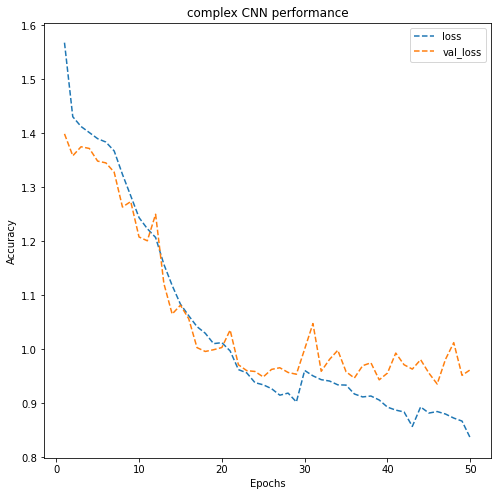

In [162]:
list_ep = [i for i in range(1, 1 + len(df))]

plt.figure(figsize = (8, 8))

plt.plot(list_ep, df['loss'], ls = '--', label = 'loss')

plt.plot(list_ep, df['val_loss'], ls = '--', label = 'val_loss')

plt.ylabel('Loss')

plt.xlabel('Epochs')

plt.legend()
plt.title('complex CNN performance')
plt.show()

In [26]:
#pd.DataFrame(history.history).to_csv("./comp_hist2.csv")
model3.save("./model3.h5")

### **Evaluating the Model on Test Set**

In [40]:
# Write your code to evaluate the model performance on the test set
model3.evaluate(validation_set)
model3.evaluate(test_set)

4/4 [==============================] - 10s 46ms/step - loss: 0.9402 - accuracy: 0.5078


[0.9401925802230835, 0.5078125]

**Observations and Insights:The model has a long training process with large number of epochs, where both training and vaidation metrics have confident improvement. Approximately at the level of 0.9 of training loss the improvement process on validation stops - to verify that I continue training and overfit a model on last epochs a little, which shows that the further training of the model doesn't make sense. The validation accuracy reaches the level of 0.52, which is confirmed by the similar value at test dataset**

### **Plotting the Confusion Matrix for the chosen final model**

Found 4977 images belonging to 4 classes.
Validation Confusion Matrix from 3rd model
              precision    recall  f1-score   support

           0       0.80      0.72      0.76       374
           1       0.52      0.67      0.58       209
           2       0.63      0.57      0.60       264
           3       0.78      0.77      0.78       177

    accuracy                           0.68      1024
   macro avg       0.68      0.68      0.68      1024
weighted avg       0.69      0.68      0.68      1024



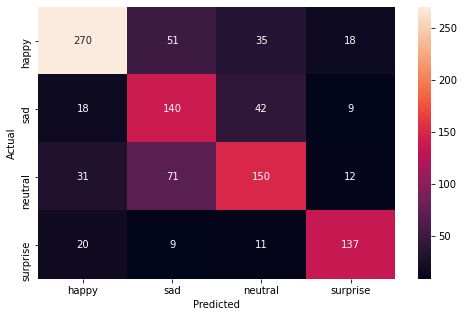

In [71]:
# Plot the confusion matrix and generate a classification report for the model
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
test_set = datagen_test.flow_from_directory(folder_path + "validation",
                                                              target_size = (img_size,img_size),
                                                              color_mode = 'grayscale',
                                                              batch_size = 1024,
                                                              class_mode = 'categorical',
                                                              classes = ['happy', 'sad', 'neutral', 'surprise'],
                                                              shuffle = True) 
test_images, test_labels = next(test_set)
print('Validation Confusion Matrix from 3rd model')
# Write the name of your chosen model in the blank
pred = model3.predict(test_images)
pred = np.argmax(pred, axis = 1) 
y_true = np.argmax(test_labels, axis = 1)

# Printing the classification report
print(classification_report(y_true, pred))

# Plotting the heatmap using confusion matrix
cm = confusion_matrix(y_true, pred)
plt.figure(figsize = (8, 5))
sns.heatmap(cm, annot = True,  fmt = '.0f', xticklabels = ['happy', 'sad', 'neutral', 'surprise'], yticklabels = ['happy', 'sad', 'neutral', 'surprise'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

**Observations and Insights: 128 test images were predicted by the last model; 32 images per each class.**

**Confusion matrix shows that precision for each class varies in a range 61% - 77%, the lowest precision is for predicting the 'sad' class, while the highest one - for predicting 'surprise' class**

**Recall for each class varies in the range 56% - 81%. Classes which are predicted correctly with the highest metric values are 'happy' (81%) and 'surprise' (75%)**

## **Conclusion:**

### **There were two high-level approaches considered in this project - implementaion of transfer learning models and custom CNN models**

### **In the first approach the following models were used: VGG, ResNet and EfficientNet. VGG-based model provided moderate performance, while the last two shown quite poor quality during various experiments**

### **Last type of the model was created manually, via several convolutional blocks. This model shown the best performance overall, slightly better than VGG-based model and has a good generalization capability, predictions on the test set were stable and match performance with train and validation sets**

### **Insights**

### **Refined insights**:
- What are the most meaningful insights from the data relevant to the problem?

**The size of the image is 48 x 48, which is not too large, so probably the model with huge amount of weights won't have a significant benefit for this data**

**The pictures look almost grayscale - no visual presence of colors - it means that we can use only one channel without loosing too much information of the data**

### **Comparison of various techniques and their relative performance**:
- How do different techniques perform? Which one is performing relatively better? Is there scope to improve the performance further?

**Custom model shown relatively better performance than transfer models. It still can be the case when for some set of hyperparameters the transfer learning will perform much better, but it's hard to check in practice, at least my experiments show the simialar results. It's also possible to unfreeze some previous layers from transfer models, but again, it could take a lot of time and resources. In the lack of time I would choose the custom model, which already has a good performance without too much tuning**

### **Proposal for the final solution design**:
- What model do you propose to be adopted? Why is this the best solution to adopt?

**The last CNN model should be adopted since it has the best performance in comparison to all transfer learning models, having the less weights at the same time, hence, requires less memory for store and implementation. Also it has a good generalization effect - metrics on test dataset are close to training ones. When compare this model (call it number 3) with the first two from Milestone 1, it can be seen that 3rd model looses in accuracy comparing to the first two models. However, first two models are not stable: they produce too different F-1 score for each class, which make them less favorable. At the same time the 3rd model has more balanced metrics for each class.**

*Here the second CNN model from Milestone 1 would be trained. Despite it has better overall accuracy, it became less stable than the previous model because of poor recall on 'sad' and 'neutral' categories*

In [48]:
# Creating sequential model
model4 = Sequential()
 
model4.add(Conv2D(256, (2, 2), padding = "same", input_shape = (48, 48, 3), activation='relu'))

model4.add(BatchNormalization())

model4.add(LeakyReLU(0.1))


model4.add(MaxPooling2D((2, 2)))

model4.add(Conv2D(128, (2, 2), padding = "same", activation='relu'))

model4.add(BatchNormalization())

model4.add(LeakyReLU(0.1))

model4.add(MaxPooling2D((2, 2)))

model4.add(Conv2D(64, (2, 2), padding = "same", activation='relu'))

model4.add(BatchNormalization())

model4.add(LeakyReLU(0.1))

model4.add(MaxPooling2D((2, 2)))

model4.add(Conv2D(32, (2, 2), padding = "same", activation='relu'))

model4.add(BatchNormalization())

model4.add(LeakyReLU(0.1))

model4.add(MaxPooling2D((2, 2)))

model4.add(Flatten())

model4.add(Dense(512, activation='relu'))

model4.add(Dense(256, activation='relu'))

model4.add(Dense(4, activation='softmax'))

model4.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_41 (Conv2D)           (None, 48, 48, 256)       3328      
_________________________________________________________________
batch_normalization_42 (Batc (None, 48, 48, 256)       1024      
_________________________________________________________________
leaky_re_lu_22 (LeakyReLU)   (None, 48, 48, 256)       0         
_________________________________________________________________
max_pooling2d_40 (MaxPooling (None, 24, 24, 256)       0         
_________________________________________________________________
conv2d_42 (Conv2D)           (None, 24, 24, 128)       131200    
_________________________________________________________________
batch_normalization_43 (Batc (None, 24, 24, 128)       512       
_________________________________________________________________
leaky_re_lu_23 (LeakyReLU)   (None, 24, 24, 128)     

In [49]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

checkpoint = ModelCheckpoint("./model4.h5", monitor='val_loss', verbose = 1, save_best_only = True, mode = 'min')

early_stopping = EarlyStopping(monitor = 'val_loss',
                          min_delta = 0,
                          patience = 3,
                          verbose = 1,
                          restore_best_weights = True
                          ) # Write your code here. You may play around with the hyperparameters if you wish.

reduce_learningrate = ReduceLROnPlateau(monitor = 'val_loss',
                              factor = 0.2,
                              patience = 3,
                              verbose = 1,
                              min_delta = 0.0001) # Write your code here. You may play around with the hyperparameters if you wish.

callbacks_list = [early_stopping, checkpoint, reduce_learningrate]

epochs = 30

In [50]:
model4.compile(optimizer = Adam(learning_rate=0.001), loss = 'categorical_crossentropy', metrics = ['accuracy'])
# Write your code to compile your model2. Use categorical crossentropy as the loss function, Adam Optimizer with 0.001 learning rate, and set metrics as 'accuracy'. 

In [51]:
history = model4.fit(train_set, validation_data = validation_set, callbacks = callbacks_list, epochs=epochs)# Write your code to fit your model2. Use train_set as the training data and validation_set as the validation data. Train your model for 20 epochs.

Epoch 1/30
473/473 [==============================] - 27s 53ms/step - loss: 1.3449 - accuracy: 0.3714 - val_loss: 1.2625 - val_accuracy: 0.4111

Epoch 00001: val_loss improved from inf to 1.26253, saving model to ./model4.h5
Epoch 2/30
473/473 [==============================] - 25s 51ms/step - loss: 1.0737 - accuracy: 0.5237 - val_loss: 1.0334 - val_accuracy: 0.5521

Epoch 00002: val_loss improved from 1.26253 to 1.03336, saving model to ./model4.h5
Epoch 3/30
473/473 [==============================] - 28s 58ms/step - loss: 0.9560 - accuracy: 0.5869 - val_loss: 0.9077 - val_accuracy: 0.6162

Epoch 00003: val_loss improved from 1.03336 to 0.90771, saving model to ./model4.h5
Epoch 4/30
473/473 [==============================] - 28s 55ms/step - loss: 0.8806 - accuracy: 0.6218 - val_loss: 0.8882 - val_accuracy: 0.6347

Epoch 00004: val_loss improved from 0.90771 to 0.88821, saving model to ./model4.h5
Epoch 5/30
473/473 [==============================] - 28s 56ms/step - loss: 0.8298 - acc

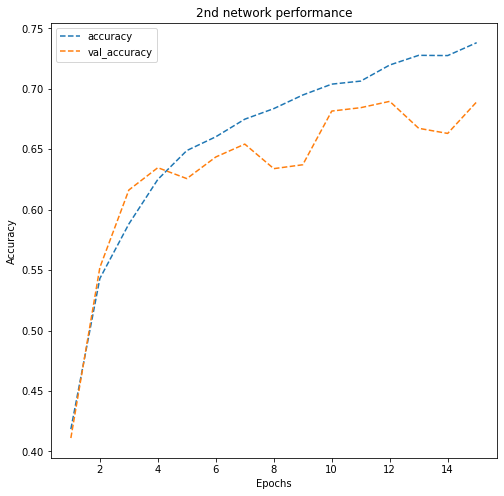

In [53]:
# Plotting the accuracies

dict_hist = history.history

list_ep = [i for i in range(1, 1 + len(history.history['loss']))]

plt.figure(figsize = (8, 8))

plt.plot(list_ep, dict_hist['accuracy'], ls = '--', label = 'accuracy')

plt.plot(list_ep, dict_hist['val_accuracy'], ls = '--', label = 'val_accuracy')

plt.ylabel('Accuracy')

plt.xlabel('Epochs')

plt.legend()
plt.title('2nd network performance')
plt.show()

In [52]:
model4.evaluate(test_set)

4/4 [==============================] - 2s 32ms/step - loss: 0.7155 - accuracy: 0.6875


[0.7154881358146667, 0.6875]

Found 4977 images belonging to 4 classes.
              precision    recall  f1-score   support

           0       0.79      0.77      0.78       369
           1       0.24      0.22      0.23       233
           2       0.26      0.27      0.27       256
           3       0.72      0.82      0.77       166

    accuracy                           0.53      1024
   macro avg       0.50      0.52      0.51      1024
weighted avg       0.52      0.53      0.53      1024



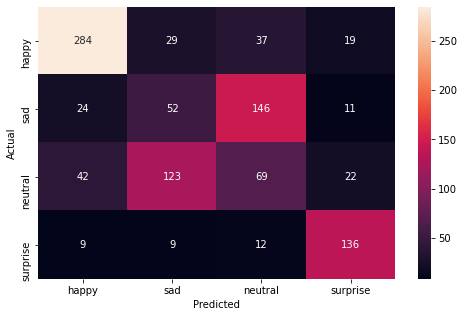

In [60]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
test_set = datagen_test.flow_from_directory(folder_path + "validation",
                                                              target_size = (img_size,img_size),
                                                              color_mode = 'rgb',
                                                              batch_size = 1024,
                                                              class_mode = 'categorical',
                                                              classes = ['happy', 'sad', 'neutral', 'surprise'],
                                                              shuffle = True) 
test_images, test_labels = next(test_set)

# Write the name of your chosen model in the blank
pred = model4.predict(test_images)
pred = np.argmax(pred, axis = 1) 
y_true = np.argmax(test_labels, axis = 1)

# Printing the classification report
print(classification_report(y_true, pred))

# Plotting the heatmap using confusion matrix
cm = confusion_matrix(y_true, pred)
plt.figure(figsize = (8, 5))
sns.heatmap(cm, annot = True,  fmt = '.0f', xticklabels = ['happy', 'sad', 'neutral', 'surprise'], yticklabels = ['happy', 'sad', 'neutral', 'surprise'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()